# Physical Activity Prediction 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("physical_activity.csv")

In [4]:
df.head()

activityID  heart_rate  hand temperature (°C)  \
0  transient activities       104.0                   30.0   
1  transient activities       104.0                   30.0   
2  transient activities       104.0                   30.0   
3  transient activities       104.0                   30.0   
4  transient activities       104.0                   30.0   

   hand acceleration X ±16g  hand acceleration Y ±16g  \
0                   2.37223                   8.60074   
1                   2.18837                   8.56560   
2                   2.37357                   8.60107   
3                   2.07473                   8.52853   
4                   2.22936                   8.83122   

   hand acceleration Z ±16g  hand gyroscope X  hand gyroscope Y  \
0                   3.51048         -0.092217          0.056812   
1                   3.66179         -0.024413          0.047759   
2                   3.54898         -0.057976          0.032574   
3                   3.66021         -0.002352          0.032810   
4                   3.70000          0.012269          0.018305   

   hand gyroscope Z  hand magnetometer X  ...  ankle acceleration X ±16g  \
0         -0.015845              14.6806  ...                    9.65918   
1          0.006474              14.8991  ...                    9.69370   
2         -0.006988              14.2420  ...                    9.58944   
3         -0.003747              14.8908  ...                    9.58814   
4         -0.053325              15.5612  ...                    9.69771   

   ankle acceleration Y ±16g  ankle acceleration Z ±16g  ankle gyroscope X  \
0                   -1.65569                  -0.099797           0.008300   
1                   -1.57902                  -0.215687          -0.006577   
2                   -1.73276                   0.092914           0.003014   
3                   -1.77040                   0.054545           0.003175   
4                   -1.65625                  -0.060809           0.012698   

   ankle gyroscope Y  ankle gyroscope Z  ankle magnetometer X  \
0           0.009250          -0.017580              -61.1888   
1          -0.004638           0.000368              -59.8479   
2           0.000148           0.022495              -60.7361   
3          -0.020301           0.011275              -60.4091   
4          -0.014303          -0.002823              -61.5199   

   ankle magnetometer Y  ankle magnetometer Z  PeopleId  
0              -38.9599              -58.1438         1  
1              -38.8919              -58.5253         1  
2              -39.4138              -58.3999         1  
3              -38.7635              -58.3956         1  
4              -39.3879              -58.2694         1  

[5 rows x 33 columns]

In [5]:
df.tail()

activityID  heart_rate  hand temperature (°C)  \
376412  transient activities       128.0                   30.5   
376413  transient activities       128.0                   30.5   
376414  transient activities       128.0                   30.5   
376415  transient activities       128.0                   30.5   
376416  transient activities       128.0                   30.5   

        hand acceleration X ±16g  hand acceleration Y ±16g  \
376412                   2.02477                   7.29553   
376413                   2.10836                   7.86504   
376414                   2.07163                   8.39581   
376415                   2.19569                   8.77634   
376416                   2.14774                   8.66047   

        hand acceleration Z ±16g  hand gyroscope X  hand gyroscope Y  \
376412                   5.74194           1.51616         -0.044713   
376413                   5.85674           1.54223         -0.023898   
376414                   5.77742           1.50239         -0.029592   
376415                   6.00892           1.33222         -0.052372   
376416                   5.73918           1.20910         -0.070005   

        hand gyroscope Z  hand magnetometer X  ...  ankle acceleration X ±16g  \
376412         -0.085853              18.8018  ...                    9.89247   
376413         -0.075649              17.6871  ...                    9.77339   
376414         -0.074682              18.0358  ...                    9.81482   
376415         -0.034189              17.9474  ...                    9.85194   
376416         -0.018819              17.7419  ...                    9.85084   

        ankle acceleration Y ±16g  ankle acceleration Z ±16g  \
376412                  -0.404788                  -0.027988   
376413                  -0.440118                  -0.260527   
376414                  -0.517578                  -0.105264   
376415                  -0.365619                  -0.144416   
376416                  -0.365298                  -0.183018   

        ankle gyroscope X  ankle gyroscope Y  ankle gyroscope Z  \
376412           0.048745          -0.008034           0.018600   
376413           0.042113           0.024647           0.013375   
376414          -0.014889           0.026009           0.025054   
376415           0.047026          -0.035531           0.024640   
376416           0.042585           0.017541          -0.037893   

        ankle magnetometer X  ankle magnetometer Y  ankle magnetometer Z  \
376412              -58.8381              -36.2397              -11.0980   
376413              -58.9537              -36.3379              -11.7170   
376414              -59.1781              -35.8985              -10.9678   
376415              -58.8299              -36.6845              -10.8553   
376416              -59.1707              -36.7731              -11.5961   

        PeopleId  
376412         1  
376413         1  
376414         1  
376415         1  
376416         1  

[5 rows x 33 columns]

In [6]:
df.shape

(376417, 33)

In [7]:
df.columns

Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376417 entries, 0 to 376416
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   activityID                 376417 non-null  object 
 1   heart_rate                 376417 non-null  float64
 2   hand temperature (°C)      376417 non-null  float64
 3   hand acceleration X ±16g   376417 non-null  float64
 4   hand acceleration Y ±16g   376417 non-null  float64
 5   hand acceleration Z ±16g   376417 non-null  float64
 6   hand gyroscope X           376417 non-null  float64
 7   hand gyroscope Y           376417 non-null  float64
 8   hand gyroscope Z           376417 non-null  float64
 9   hand magnetometer X        376417 non-null  float64
 10  hand magnetometer Y        376417 non-null  float64
 11  hand magnetometer Z        376417 non-null  float64
 12  chest temperature (°C)     376417 non-null  float64
 13  chest acceleration X ±16g  37

In [11]:
df.describe()

heart_rate  hand temperature (°C)  hand acceleration X ±16g  \
count  376417.000000          376417.000000             376417.000000   
mean      124.144121              32.428912                 -3.354971   
std        24.000173               1.236819                  6.371742   
min        78.000000              30.000000               -127.649000   
25%       104.000000              31.437500                 -7.841620   
50%       125.000000              32.812500                 -2.989520   
75%       136.000000              33.500000                  1.669090   
max       183.000000              33.875000                 26.145800   

       hand acceleration Y ±16g  hand acceleration Z ±16g  hand gyroscope X  \
count             376417.000000             376417.000000     376417.000000   
mean                   6.277937                  3.403924          0.034135   
std                    5.193305                  3.382976          1.074986   
min                  -81.234400                -34.124800        -11.259100   
25%                    3.591880                  1.499060         -0.344932   
50%                    6.004240                  3.462280         -0.001415   
75%                    8.617840                  5.546500          0.342387   
max                  106.898000                132.295000         16.483800   

       hand gyroscope Y  hand gyroscope Z  hand magnetometer X  \
count     376417.000000     376417.000000        376417.000000   
mean           0.046013          0.002007            15.341051   
std            0.871584          1.656884            34.826464   
min          -22.212700        -10.608800           -75.282900   
25%           -0.219189         -0.344264           -12.934800   
50%            0.008501         -0.005333            16.172500   
75%            0.287978          0.340952            44.260000   
max            8.666640          9.998620           172.590000   

       hand magnetometer Y  ...  ankle acceleration X ±16g  \
count        376417.000000  ...              376417.000000   
mean            -30.946218  ...                   9.416030   
std              28.432180  ...                   5.870598   
min            -174.246000  ...                 -49.507200   
25%             -49.733100  ...                   8.891750   
50%             -34.185600  ...                   9.624640   
75%             -15.199300  ...                  10.003200   
max              94.127400  ...                 149.718000   

       ankle acceleration Y ±16g  ankle acceleration Z ±16g  \
count              376417.000000              376417.000000   
mean                    0.350511                  -2.195242   
std                     7.455852                   3.721741   
min                  -155.356000                -133.640000   
25%                    -2.068030                  -3.355530   
50%                    -0.177550                  -1.734520   
75%                     2.001670                  -0.523272   
max                   155.960000                  83.884500   

       ankle gyroscope X  ankle gyroscope Y  ankle gyroscope Z  \
count      376417.000000      376417.000000      376417.000000   
mean           -0.000750           0.000822           0.012913   
std             0.996610           0.603676           1.786712   
min           -11.688700          -7.807450         -11.619400   
25%            -0.192711          -0.047868          -0.311436   
50%            -0.001279           0.003726          -0.002790   
75%             0.068068           0.169171           0.057401   
max            13.142500           6.410380           9.377020   

       ankle magnetometer X  ankle magnetometer Y  ankle magnetometer Z  \
count         376417.000000         376417.000000         376417.000000   
mean             -50.888535             -4.153689             10.465915   
std               25.705198             30.607331             29.509850   
min             -172.86

In [12]:
object_columns = df.select_dtypes(include='object').columns
print("Object Columns:")
print(object_columns)
print()

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

Object Columns:
Index(['activityID'], dtype='object')

Numerical Columns:
Index(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z',
       'chest temperature (°C)', 'chest acceleration X ±16g',
       'chest acceleration Y ±16g', 'chest acceleration Z ±16g',
       'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z',
       'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z',
       'PeopleId'],
      dtype='object')


In [13]:
df.nunique()

activityID                       13
heart_rate                     2390
hand temperature (°C)            66
hand acceleration X ±16g     295028
hand acceleration Y ±16g     287319
hand acceleration Z ±16g     286897
hand gyroscope X             353266
hand gyroscope Y             352360
hand gyroscope Z             352234
hand magnetometer X          320371
hand magnetometer Y          291448
hand magnetometer Z          314198
chest temperature (°C)          122
chest acceleration X ±16g    255757
chest acceleration Y ±16g    214512
chest acceleration Z ±16g    242458
chest gyroscope X            351030
chest gyroscope Y            353643
chest gyroscope Z            349604
chest magnetometer X         306594
chest magnetometer Y         250407
chest magnetometer Z         307798
ankle temperature (°C)           92
ankle acceleration X ±16g    197169
ankle acceleration Y ±16g    253748
ankle acceleration Z ±16g    240947
ankle gyroscope X            346516
ankle gyroscope Y           

In [14]:
df['activityID'].unique()

array(['transient activities', 'lying', 'sitting', 'standing', 'ironing',
       'vacuum cleaning', 'ascending stairs', 'descending stairs',
       'walking', 'Nordic walking', 'cycling', 'running', 'rope jumping'],
      dtype=object)

In [15]:
df['activityID'].value_counts()

transient activities    126460
lying                    27187
cycling                  23575
ironing                  23573
sitting                  23480
vacuum cleaning          22941
walking                  22253
standing                 21717
running                  21265
Nordic walking           20265
ascending stairs         15890
descending stairs        14899
rope jumping             12912
Name: activityID, dtype: int64

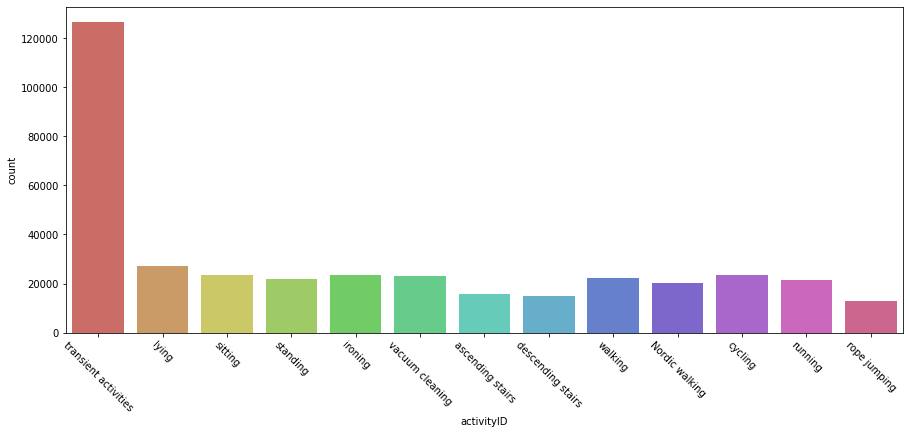

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(df['activityID'], data = df, palette = 'hls')
# x = 'activityID'
plt.xticks(rotation = -45)
plt.show()

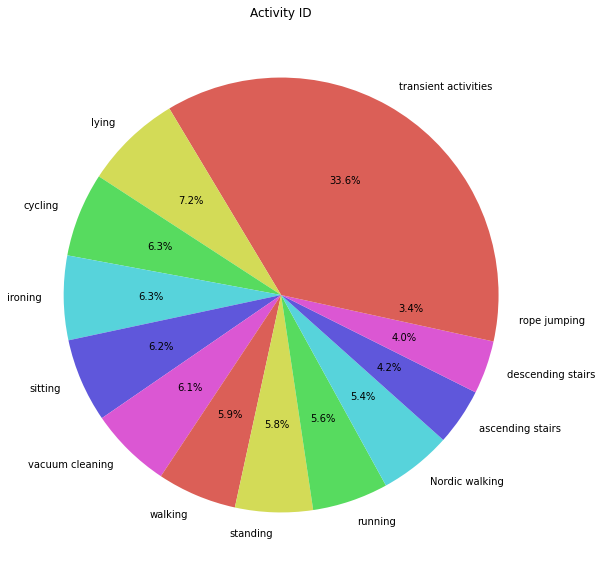

In [17]:
plt.figure(figsize=(10, 10))
counts = df['activityID'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Activity ID')
plt.show()

In [18]:
fig = go.Figure(data=[go.Bar(x=df['activityID'].value_counts().index, y=df['activityID'].value_counts())])
fig.update_layout(title='Activity ID',xaxis_title="Categories",yaxis_title="Count")
fig.show()

In [19]:
counts = df['activityID'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Activity ID')
fig.show()

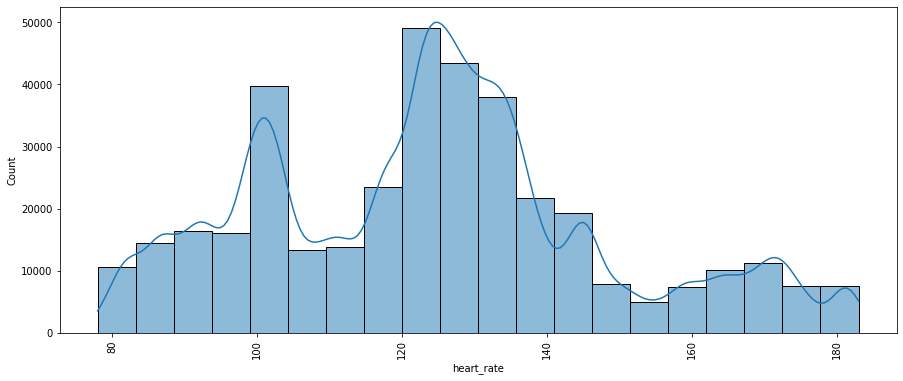

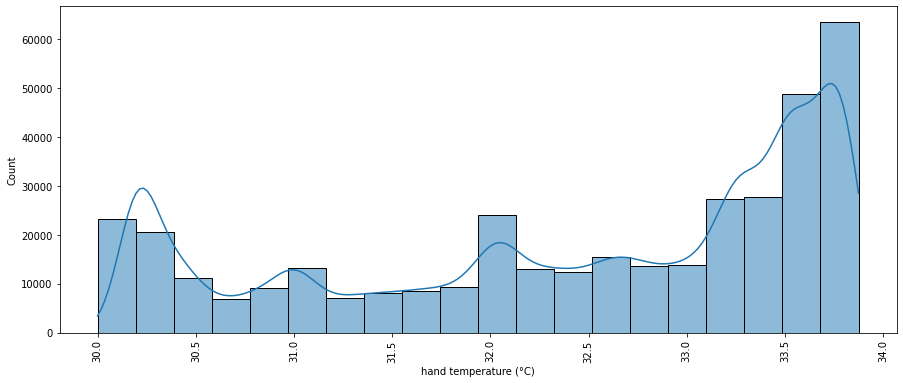

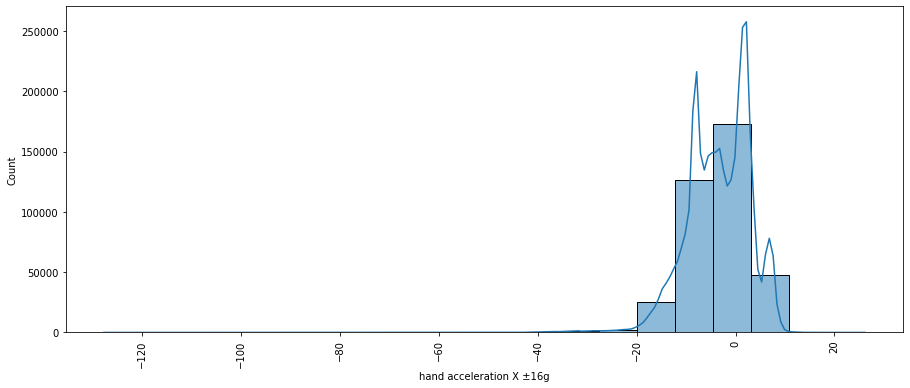

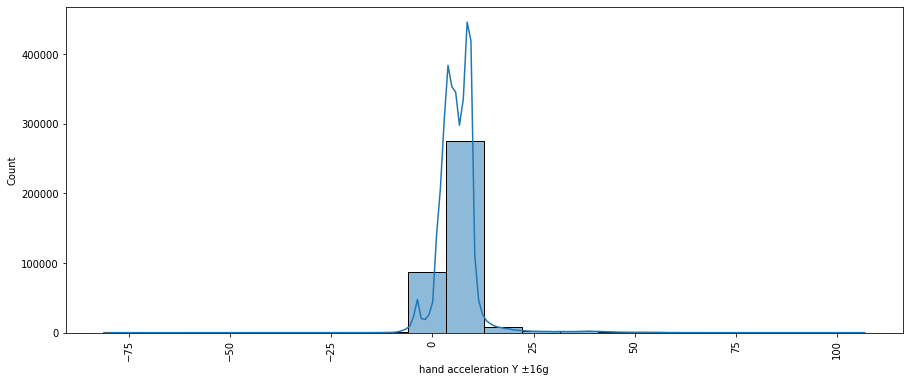

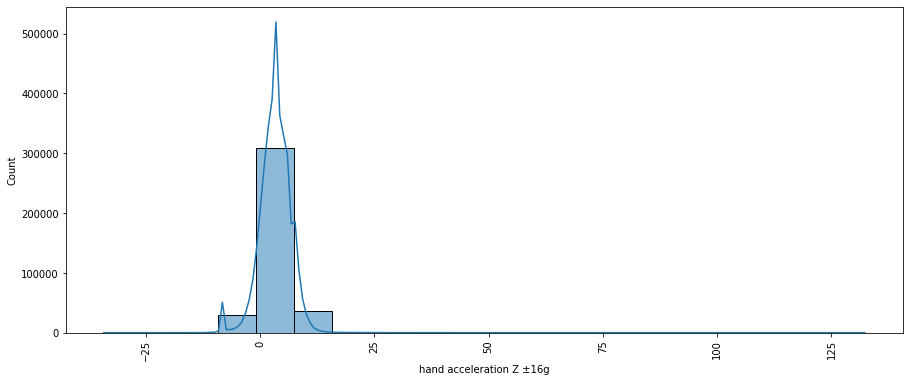

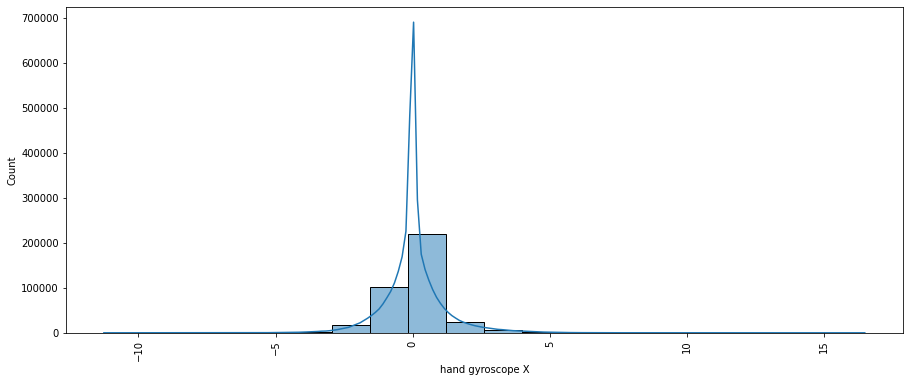

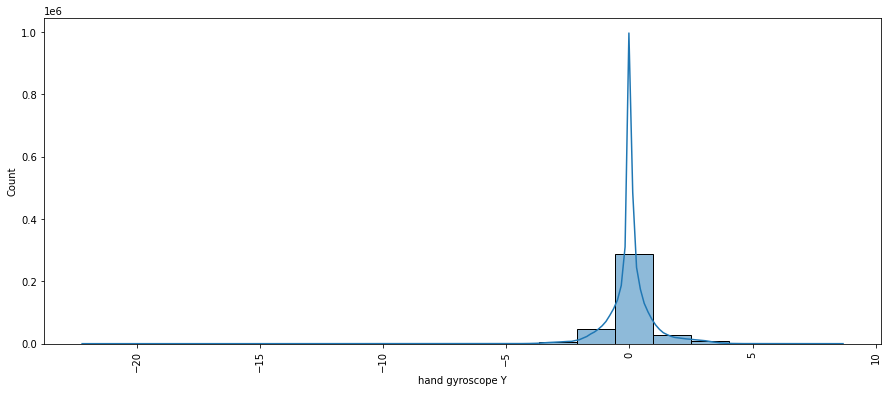

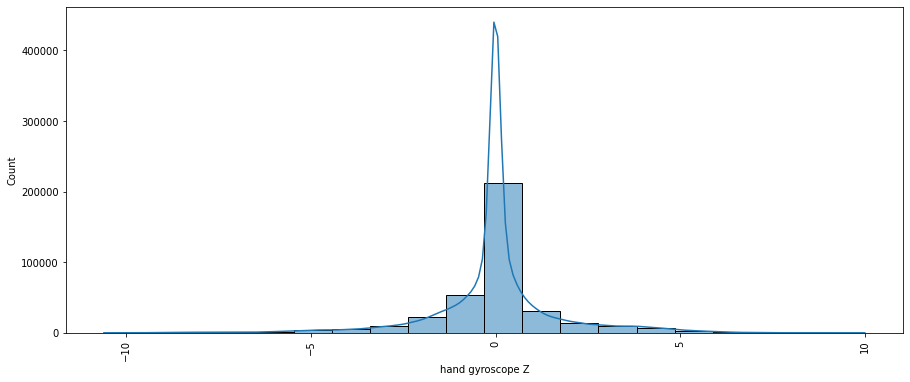

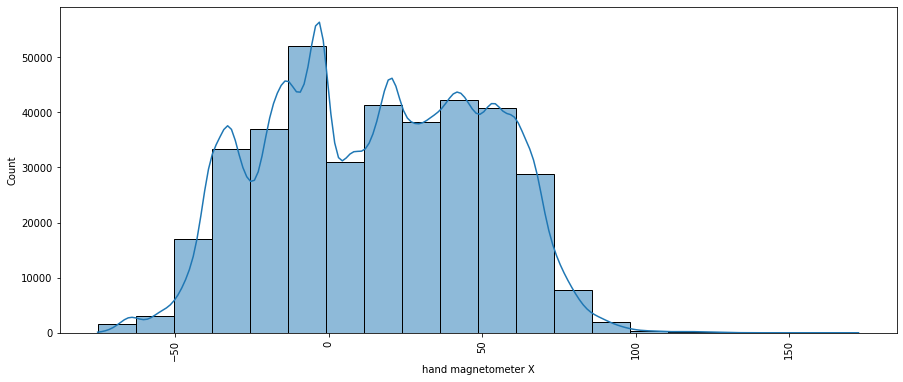

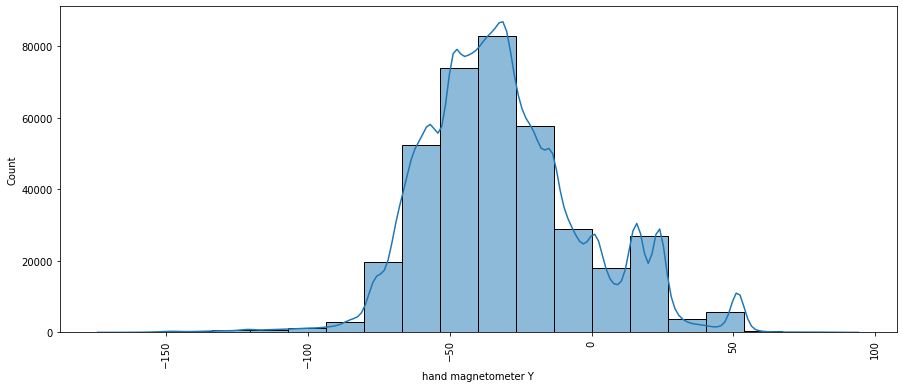

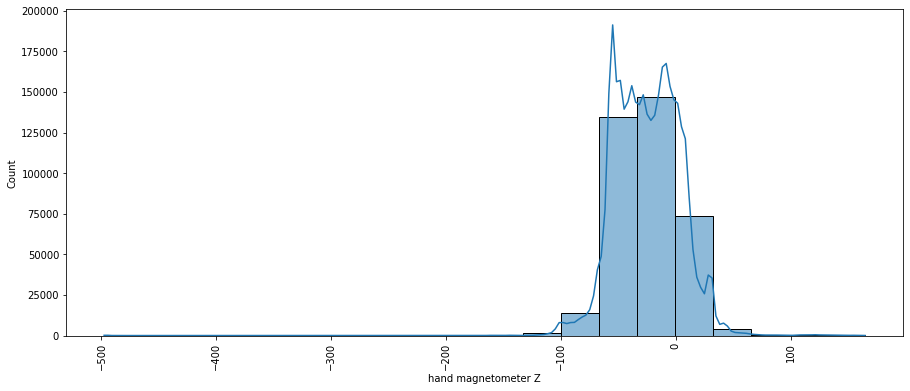

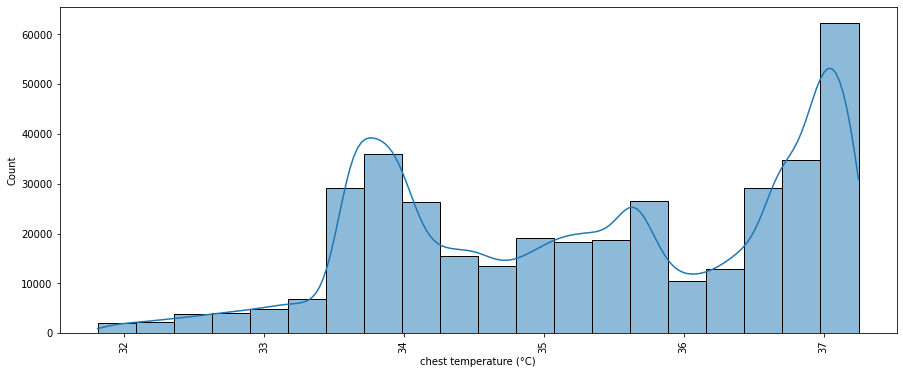

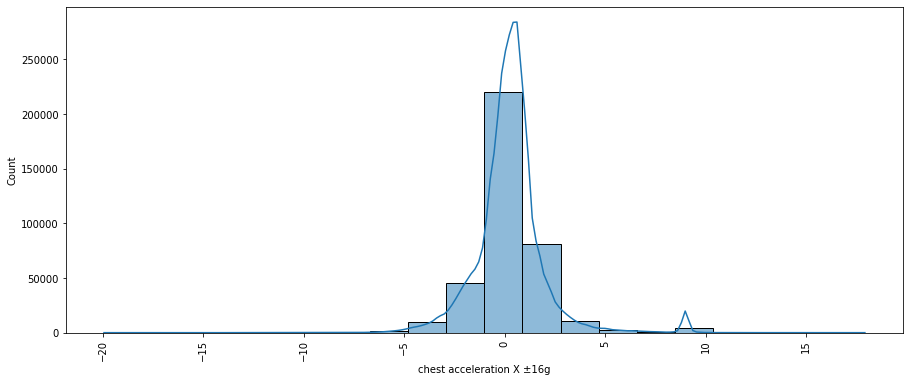

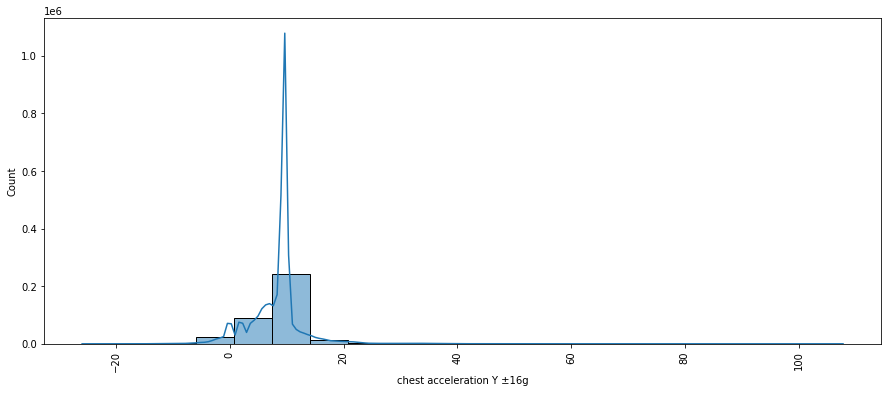

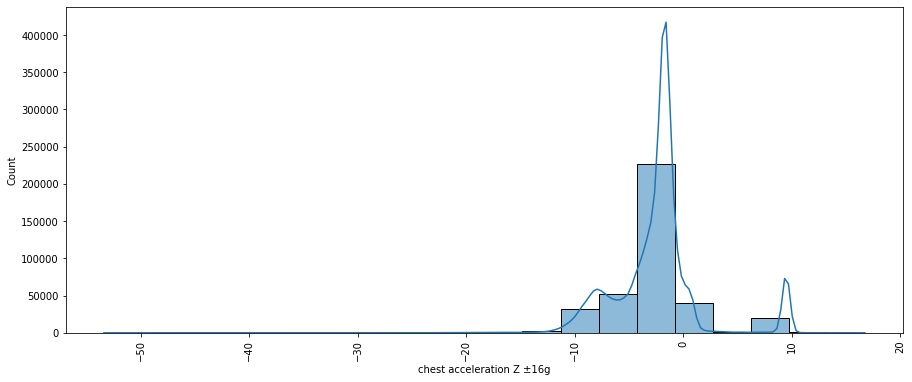

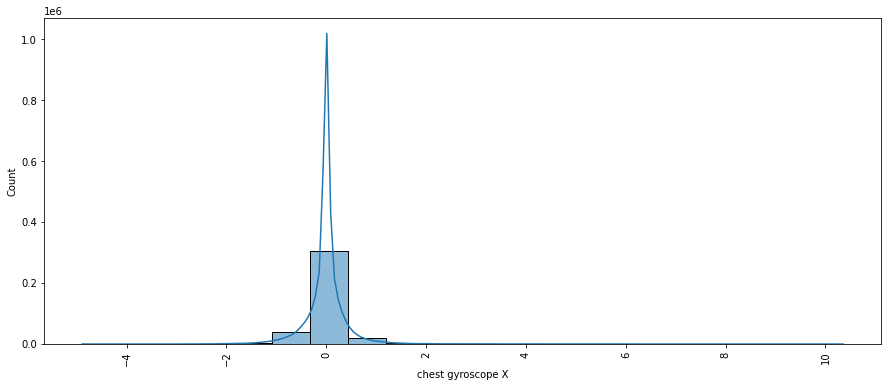

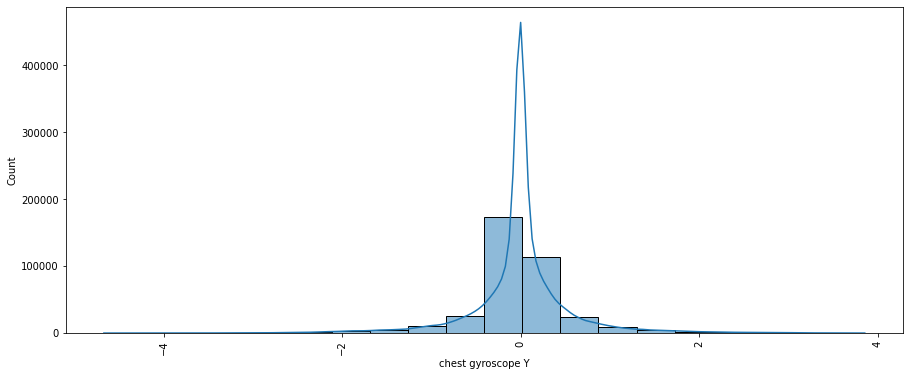

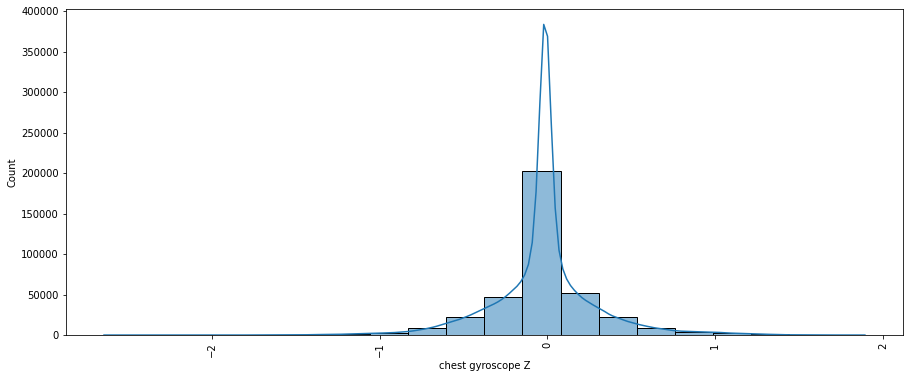

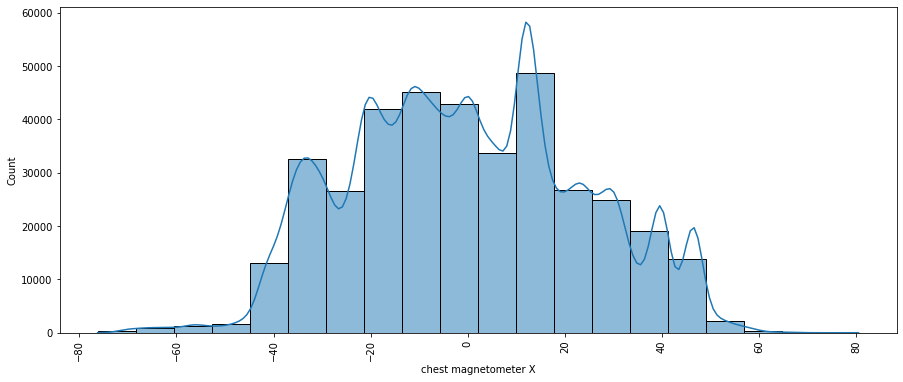

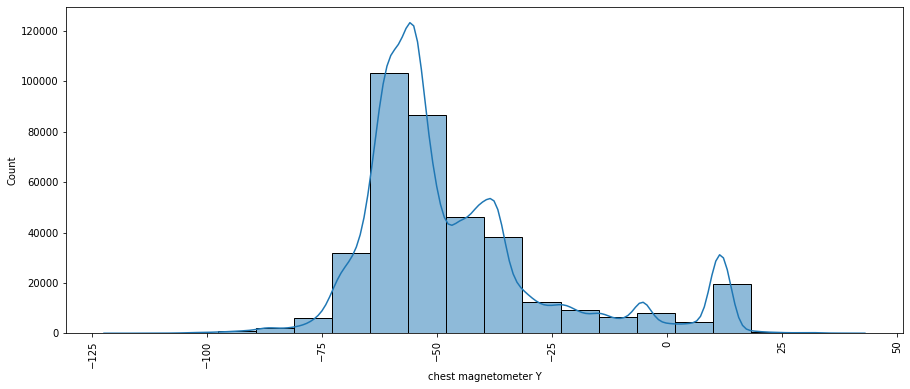

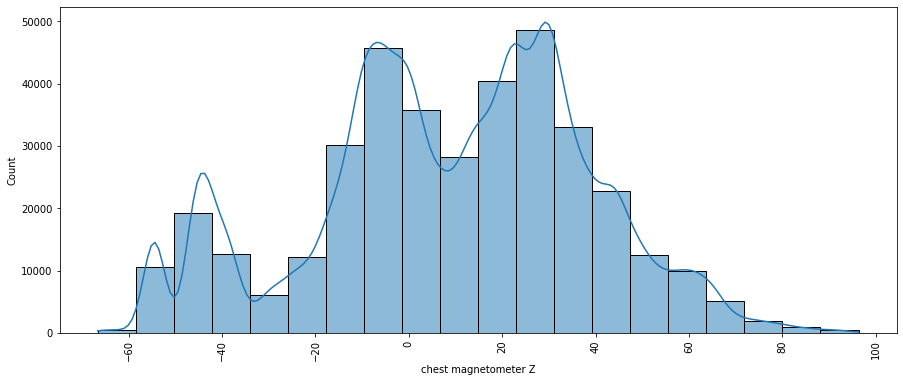

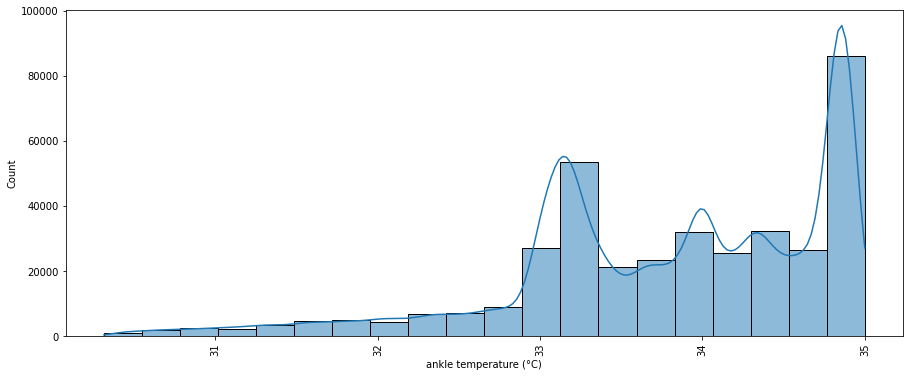

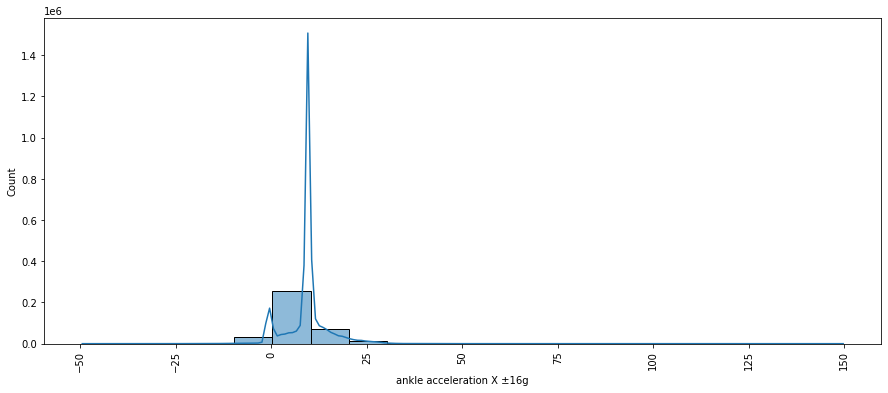

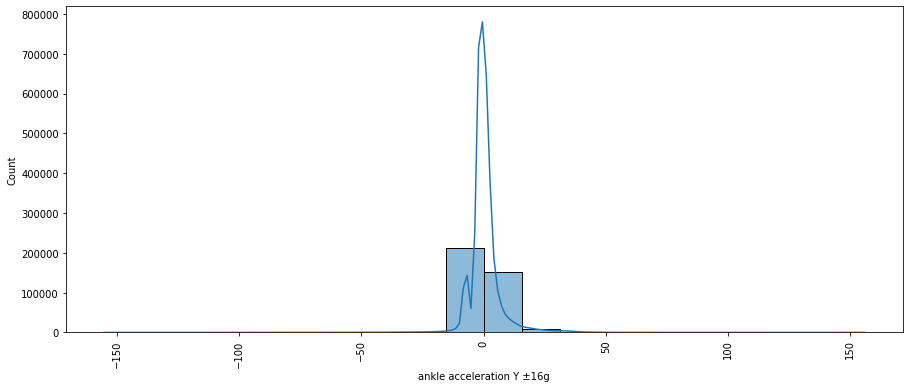

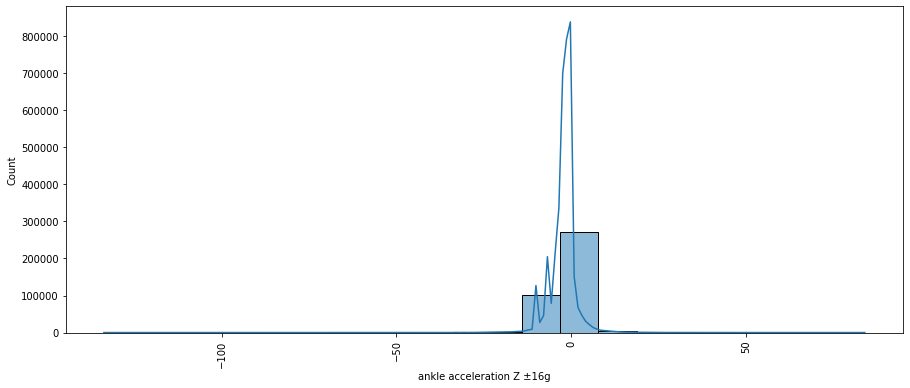

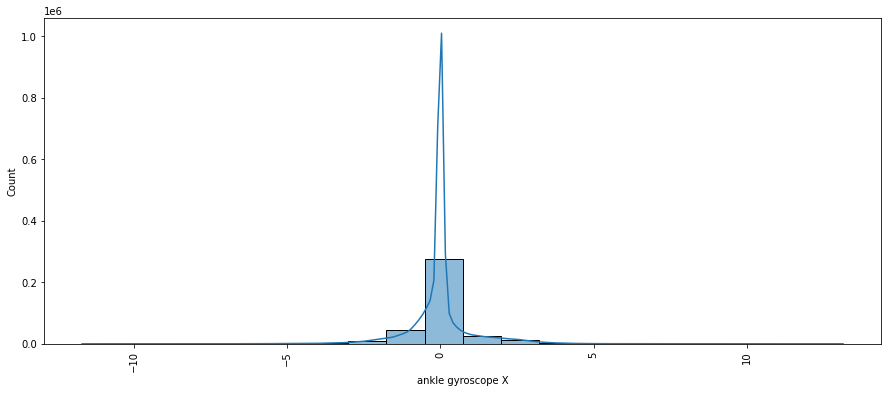

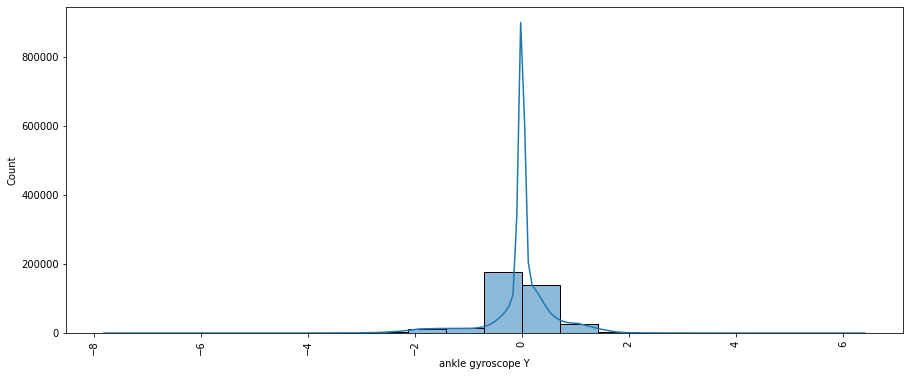

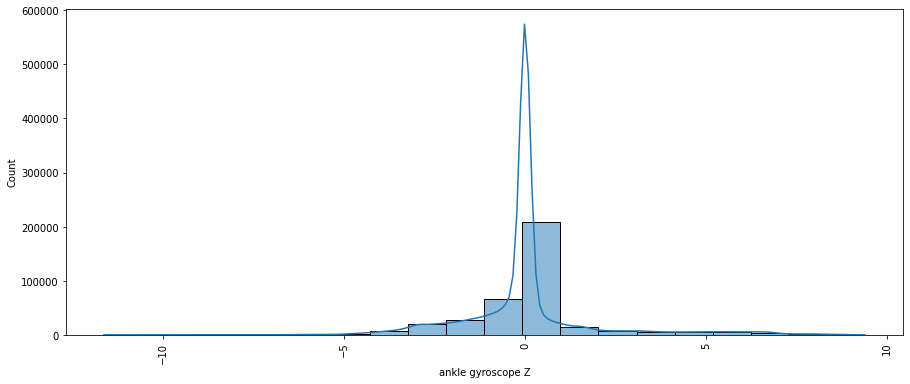

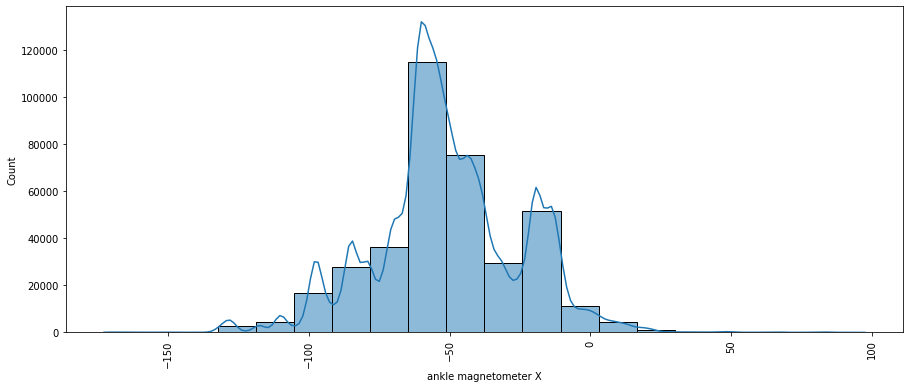

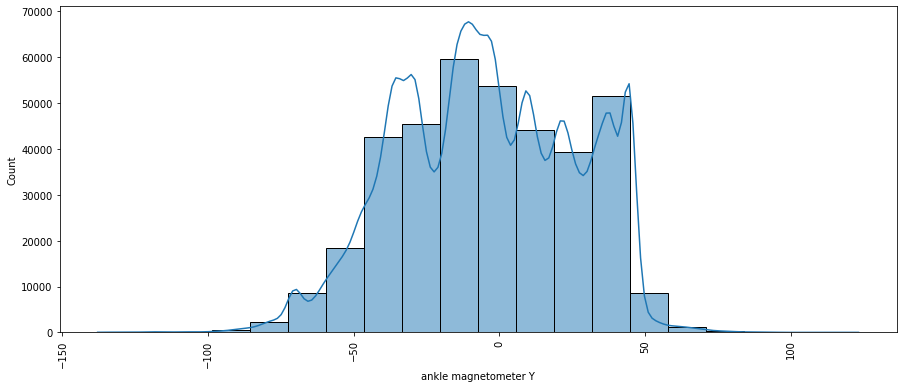

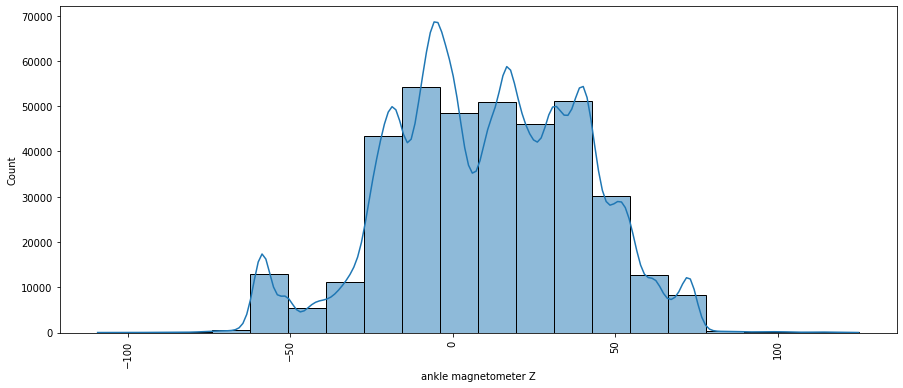

In [20]:
for i in numerical_columns:
    if i != 'PeopleId':
        plt.figure(figsize=(15, 6))
        sns.histplot(df[i], kde=True, bins=20, palette='hls')
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
for i in numerical_columns:
    if i != 'PeopleId':
        plt.figure(figsize=(15, 6))
        sns.violinplot(x = df[i], data = df, palette='hls')
        plt.xticks(rotation=90)
        plt.show()

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = px.scatter_3d(df, x=x_column, y=y_column, z=z_column, color='activityID', 
                    labels={x_column: 'X Acceleration', y_column: 'Y Acceleration', z_column: 'Z Acceleration'},
                    title='3D Scatter Plot of Hand Acceleration')

fig.show()

fig = go.Figure(data=[go.Surface(z=df[z_column].values.reshape(-1, 10))])
fig.update_layout(title='3D Surface Plot of Hand Gyroscope',
                  scene=dict(
                      xaxis_title=x_column,
                      yaxis_title=y_column,
                      zaxis_title=z_column
                  ))
fig.show()

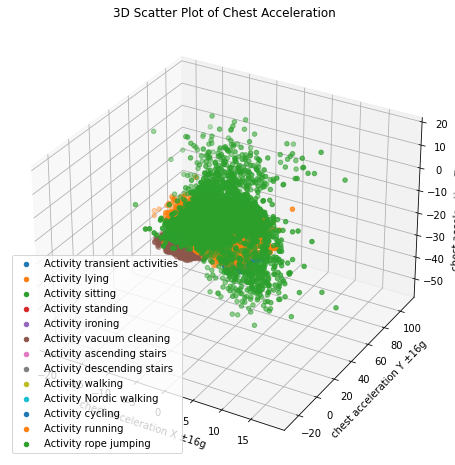

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x_column_chest = 'chest acceleration X ±16g'
y_column_chest = 'chest acceleration Y ±16g'
z_column_chest = 'chest acceleration Z ±16g'

for activity_id in df['activityID'].unique():
    activity_data = df[df['activityID'] == activity_id]
    ax.scatter(activity_data[x_column_chest], activity_data[y_column_chest], activity_data[z_column_chest], label=f"Activity {activity_id}")

ax.set_title("3D Scatter Plot of Chest Acceleration")
ax.set_xlabel(x_column_chest)
ax.set_ylabel(y_column_chest)
ax.set_zlabel(z_column_chest)
ax.legend()
plt.show()

In [34]:
df = df.drop('PeopleId', axis = 1)

In [35]:
corr = df.corr()

In [36]:
corr

heart_rate  hand temperature (°C)  \
heart_rate                   1.000000              -0.243610   
hand temperature (°C)       -0.243610               1.000000   
hand acceleration X ±16g    -0.250458              -0.216103   
hand acceleration Y ±16g     0.182745              -0.136318   
hand acceleration Z ±16g    -0.200633               0.022235   
hand gyroscope X             0.053749              -0.056558   
hand gyroscope Y             0.061917              -0.044318   
hand gyroscope Z             0.001078              -0.001437   
hand magnetometer X          0.277020               0.058277   
hand magnetometer Y         -0.225187               0.059409   
hand magnetometer Z          0.182416              -0.014091   
chest temperature (°C)       0.192330               0.697345   
chest acceleration X ±16g   -0.185980              -0.123295   
chest acceleration Y ±16g    0.141986               0.061083   
chest acceleration Z ±16g   -0.346361              -0.178912   
chest gyroscope X            0.008496              -0.006358   
chest gyroscope Y            0.026790              -0.031473   
chest gyroscope Z           -0.019991               0.011257   
chest magnetometer X        -0.132869              -0.078235   
chest magnetometer Y        -0.243596              -0.072825   
chest magnetometer Z         0.404842              -0.026925   
ankle temperature (°C)       0.319030               0.745723   
ankle acceleration X ±16g    0.304563               0.085528   
ankle acceleration Y ±16g    0.186473              -0.015587   
ankle acceleration Z ±16g    0.198598               0.118369   
ankle gyroscope X            0.002482              -0.012347   
ankle gyroscope Y            0.016324              -0.009105   
ankle gyroscope Z            0.004912               0.000386   
ankle magnetometer X        -0.039777               0.077916   
ankle magnetometer Y        -0.283279               0.070272   
ankle magnetometer Z        -0.110298               0.150367   

                           hand acceleration X ±16g  hand acceleration Y ±16g  \
heart_rate                                -0.250458                  0.182745   
hand temperature (°C)                     -0.216103                 -0.136318   
hand acceleration X ±16g                   1.000000                 -0.073462   
hand acceleration Y ±16g                  -0.073462                  1.000000   
hand acceleration Z ±16g                  -0.035276                  0.043959   
hand gyroscope X                           0.002916                  0.141162   
hand gyroscope Y                          -0.058068                  0.008016   
hand gyroscope Z                           0.090899                  0.008483   
hand magnetometer X                       -0.543086                 -0.098223   
hand magnetometer Y                        0.013738                 -0.296492   
hand magnetometer Z                       -0.113181                  0.091506   
chest temperature (°C)                    -0.282963                 -0.069867   
chest acceleration X ±16g                  0.063460                 -0.032027   
chest acceleration Y ±16g                 -0.340022                  0.461489   
chest acceleration Z ±16g                  0.474326                 -0.161428   
chest gyroscope X                         -0.113156                  0.157325   
chest gyroscope Y                          0.001712                 -0.024969   
chest gyroscope Z                          0.089277                  0.016292   
chest magnetometer X                       0.157914                 -0.010188   
chest magnetometer Y                       0.215256                 -0.134722   
chest magnetometer Z                      -0.314907                  0.083906   
ankle temperature (°C)                    -0.347321                 -0.014767   
ankle acceleration X ±16g                 -0.259594                  0.071559   
ankle acceleration Y ±16g         

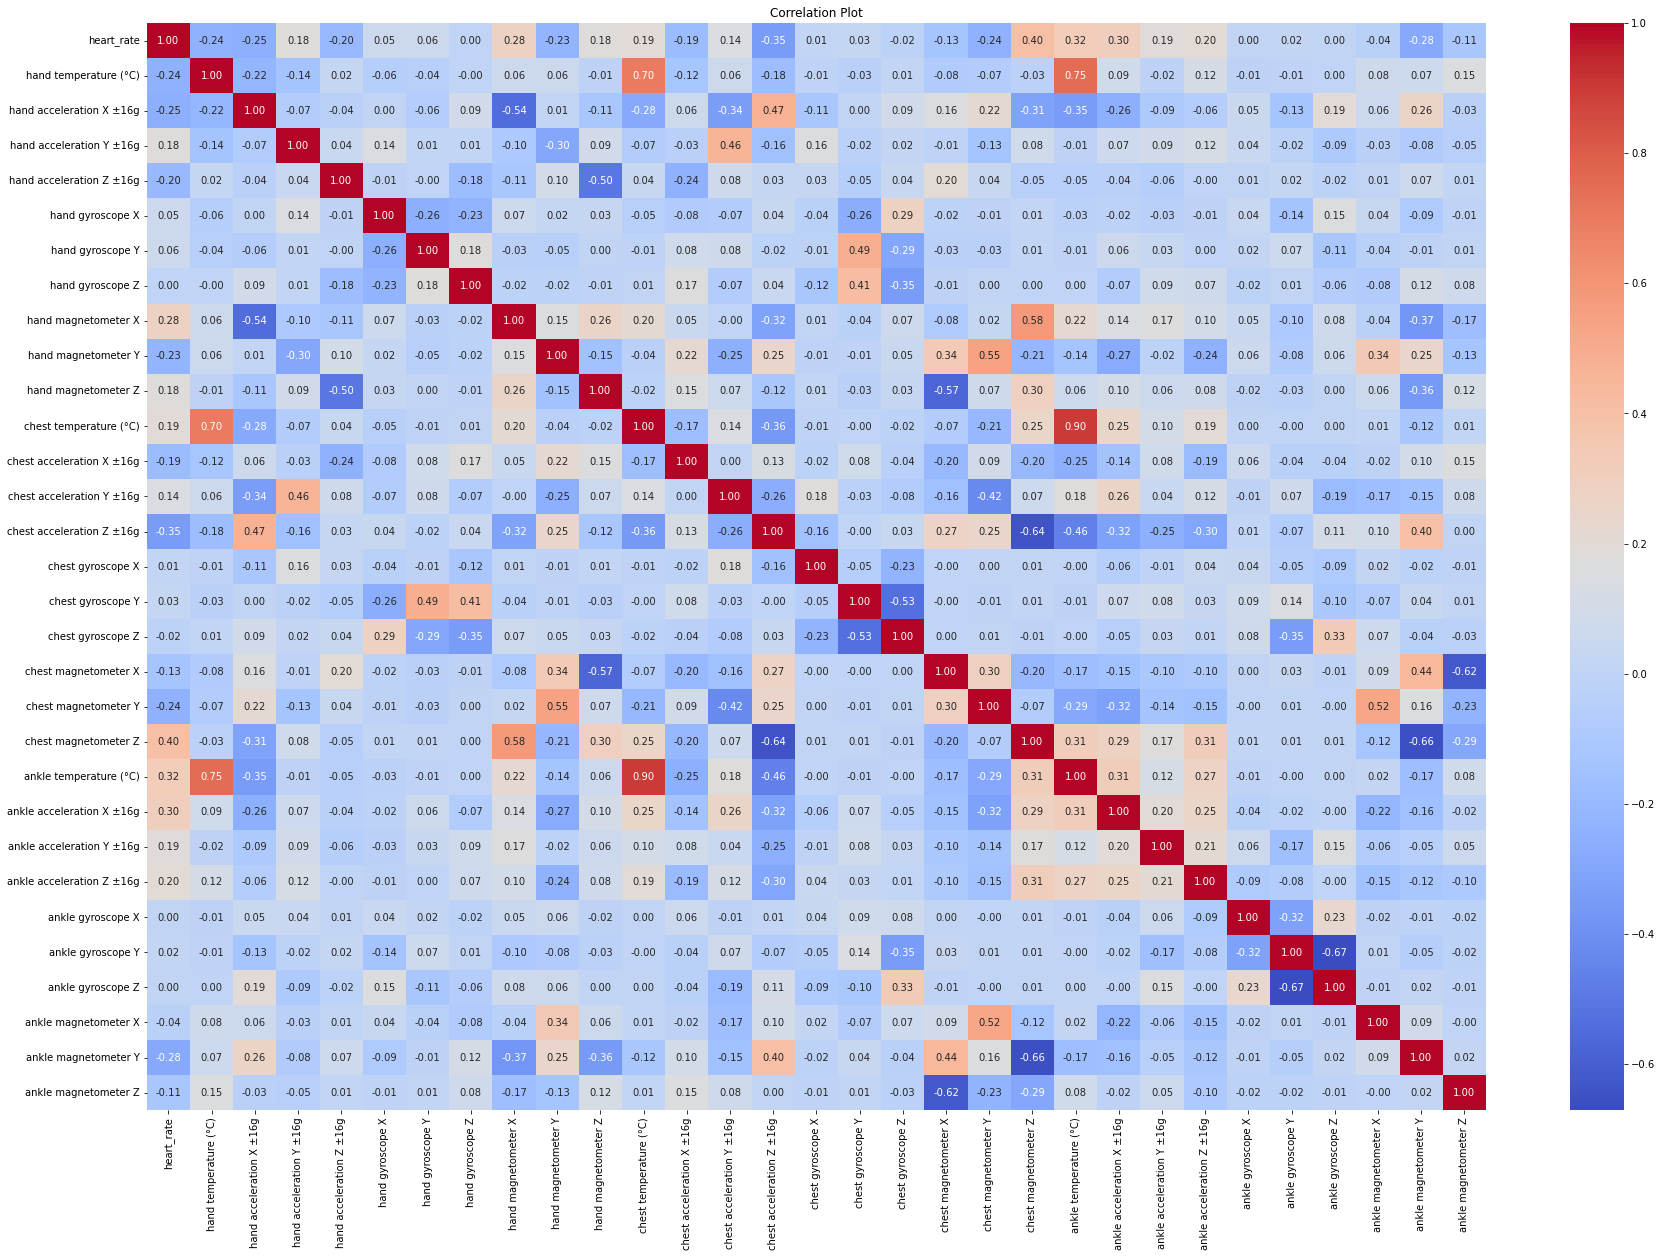

In [37]:
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [38]:
df1 = df.copy()

In [39]:
df1.columns

Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
X = df1.drop(['activityID'], axis=1)
y = df1['activityID']

In [42]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [43]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [46]:
logreg_classifier = LogisticRegression()

In [47]:
logreg_classifier.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred_logreg = logreg_classifier.predict(X_test)

In [49]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Classifier - Accuracy:", accuracy_logreg)

Logistic Regression Classifier - Accuracy: 0.7757393642258421


In [50]:
print("\nLogistic Regression Classifier - Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67     25292
           1       0.62      0.50      0.55     25292
           2       0.92      0.94      0.93     25292
           3       0.63      0.56      0.60     25292
           4       0.90      0.94      0.92     25292
           5       0.96      0.94      0.95     25292
           6       0.81      0.80      0.81     25292
           7       0.79      0.80      0.80     25292
           8       0.91      0.96      0.94     25292
           9       0.88      0.93      0.90     25292
          10       0.46      0.43      0.45     25292
          11       0.88      0.82      0.85     25292
          12       0.63      0.78      0.70     25292

    accuracy                           0.78    328796
   macro avg       0.77      0.78      0.77    328796
weighted avg       0.77      0.78      0.77    328796



In [53]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nLogistic Regression Classifier - Confusion Matrix:")
print(conf_matrix_logreg)


Logistic Regression Classifier - Confusion Matrix:
[[17114  2292    50  1900     0     0    94   311     3    29  2192     7
   1300]
 [ 1841 12728   117  2238   873    30   618   954   287   132  1145  1207
   3122]
 [  502     9 23882     0     0     0     0   148     0     0   539   211
      1]
 [ 2058  1601   244 14220    22   197  1388     0     3   374  2291   290
   2604]
 [    0     0   142     0 23838     0     0     0   541   622    38     0
    111]
 [    2     0   167     0     0 23659     0     0   900    31   378     7
    148]
 [ 1290   598    56   232     0     0 20194  1853    23     0  1031     0
     15]
 [  240   660    48   169     0     0  1872 20260     1     0  1662     4
    376]
 [    0     0    77     0     0   518     0     0 24335   262    29    23
     48]
 [    0     0     0    59   407     0     0     0   377 23575   206     0
    668]
 [ 2230   755   620  1822  1276   161   662  1975   174  1237 10941   773
   2666]
 [  380  1674   318   406     0    

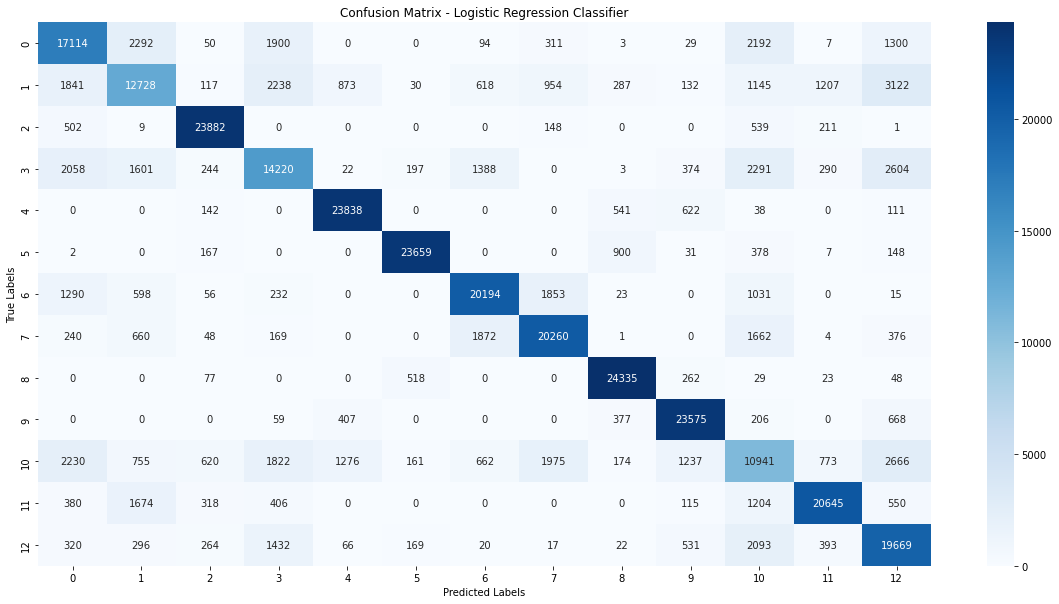

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

In [56]:
dt_classifier = DecisionTreeClassifier()

In [57]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred_dt = dt_classifier.predict(X_test)

In [59]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Classifier - Accuracy:", accuracy_dt)


Decision Tree Classifier - Accuracy: 0.9996563218530639


In [60]:
print("\nDecision Tree Classifier - Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25292
           1       1.00      1.00      1.00     25292
           2       1.00      1.00      1.00     25292
           3       1.00      1.00      1.00     25292
           4       1.00      1.00      1.00     25292
           5       1.00      1.00      1.00     25292
           6       1.00      1.00      1.00     25292
           7       1.00      1.00      1.00     25292
           8       1.00      1.00      1.00     25292
           9       1.00      1.00      1.00     25292
          10       1.00      1.00      1.00     25292
          11       1.00      1.00      1.00     25292
          12       1.00      1.00      1.00     25292

    accuracy                           1.00    328796
   macro avg       1.00      1.00      1.00    328796
weighted avg       1.00      1.00      1.00    328796



In [61]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Classifier - Confusion Matrix:")
print(conf_matrix_dt)


Decision Tree Classifier - Confusion Matrix:
[[25289     0     0     0     0     0     0     0     0     0     3     0
      0]
 [    0 25277     0    10     0     0     0     0     0     0     5     0
      0]
 [    0     0 25284     0     0     0     0     0     0     0     8     0
      0]
 [    0     6     0 25282     0     0     0     0     0     0     4     0
      0]
 [    0     0     0     0 25289     0     0     0     0     0     3     0
      0]
 [    0     0     0     0     0 25290     0     0     2     0     0     0
      0]
 [    0     0     0     0     0     0 25287     0     0     0     5     0
      0]
 [    0     0     0     0     0     0     0 25288     0     0     4     0
      0]
 [    0     0     0     0     0     0     0     0 25292     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0 25291     1     0
      0]
 [    7     4     8     8     2     0    13     2     0     1 25231     6
     10]
 [    0     0     0     0     0     0    

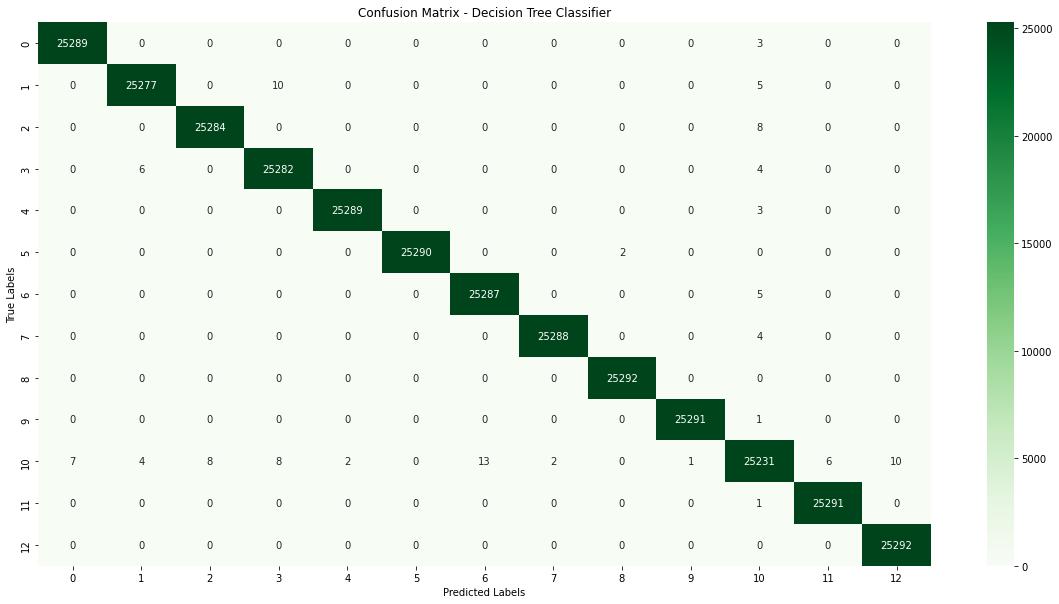

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [66]:
rf_classifier = RandomForestClassifier(n_estimators=5, criterion='gini', max_depth=10,
                                       min_samples_split=2, min_samples_leaf=1,
                                       max_features='auto', random_state=42)

In [67]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=5,
                       random_state=42)

In [68]:
y_pred = rf_classifier.predict(X_test)

In [70]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9852796262728257


In [71]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25292
           1       0.97      0.94      0.96     25292
           2       0.99      1.00      1.00     25292
           3       0.91      0.99      0.95     25292
           4       1.00      1.00      1.00     25292
           5       1.00      1.00      1.00     25292
           6       0.99      1.00      1.00     25292
           7       0.99      1.00      0.99     25292
           8       1.00      1.00      1.00     25292
           9       1.00      1.00      1.00     25292
          10       0.99      0.88      0.93     25292
          11       1.00      1.00      1.00     25292
          12       0.98      1.00      0.99     25292

    accuracy                           0.99    328796
   macro avg       0.99      0.99      0.99    328796
weighted avg       0.99      0.99      0.99    328796



In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[25292     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0 23894     0  1242     0     0     0     0     0     0   156     0
      0]
 [    0     0 25278     0     0     0     0     0     0     0    14     0
      0]
 [    0   226     0 25049     0     0     0     0     0     0    17     0
      0]
 [    0     0     0     0 25292     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0 25273     0     0    19     0     0     0
      0]
 [    0     0     0     0     0     0 25280    11     0     0     1     0
      0]
 [    0     0     0     0     0     0     0 25287     0     0     5     0
      0]
 [    0     0     0     0     0     6     0     0 25244    42     0     0
      0]
 [    0     0     0     0     0     0     0     0     0 25290     2     0
      0]
 [  167   474   155  1326    64     1   163   281     0    13 22231     6
    411]
 [    0     0     0     0     0     0     0     0     0     0    32 

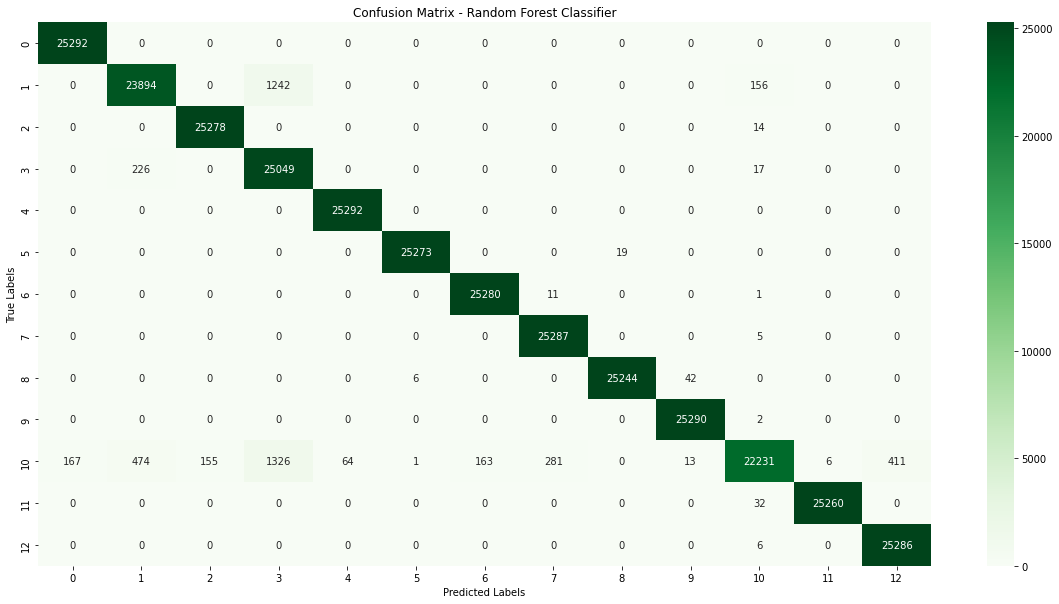

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

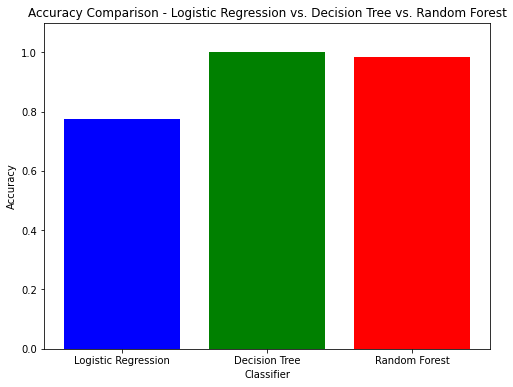

In [76]:
plt.figure(figsize=(8, 6))
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf]
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison - Logistic Regression vs. Decision Tree vs. Random Forest')
plt.ylim(0, 1.1)
plt.show()

In [77]:
fig = go.Figure(data=[go.Bar(x=classifiers, y=accuracies, marker_color=['blue', 'green', 'red'])])
fig.update_layout(
    title='Accuracy Comparison - Logistic Regression vs. Decision Tree vs. Random Forest',
    xaxis_title='Classifier',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0, 1.1]),  
)
fig.show()

In [78]:
import pickle
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)

In [79]:
with open('decision_tree_model.pkl', 'rb') as file:
    dt_model_loaded = pickle.load(file)